In [1]:
## Agora faremos a simulação de Monte Carlo!
import pandas as pd

# Ler o arquivo CSV com cabeçalhos
df = pd.read_csv('MonteCarlo1.csv', sep=';')

# Converter todas as colunas numéricas (trocando ',' por '.' antes)
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Visualizar as primeiras linhas
print(df.round(2).head())

   Obs  Var Aleatória  u normal (0,1)     X      Y
0  1.0           0.98            2.00  44.67  8.66
1  2.0           0.43           -0.16  21.65  5.64
2  3.0           0.80            0.84  18.14  6.51
3  4.0           0.67            0.44  31.52  6.61
4  5.0           0.50           -0.01  44.75  6.65


In [2]:
# Selecionar X e Y pelas posições das colunas (4ª e 5ª)
X = df.iloc[:, 3].values  # 4ª coluna → índice 3
Y = df.iloc[:, 4].values  # 5ª coluna → índice 4

# Mostrar os primeiros valores com 2 casas decimais
print("X =", X[:5].round(2))
print("Y =", Y[:5].round(2))

X = [44.67 21.65 18.14 31.52 44.75]
Y = [8.66 5.64 6.51 6.61 6.65]


In [3]:
import numpy as np

X_media=X.mean()
Y_media=Y.mean()

X_dif_da_media = X - X_media
Y_dif_da_media = Y - Y_media

beta_chapeu=sum(X_dif_da_media * Y_dif_da_media) / sum(X_dif_da_media**2)
print("Beta chapéu =", np.round(beta_chapeu, 3))

alfa_chapeu=Y_media - beta_chapeu * X_media
print("Alfa chapéu =", np.round(alfa_chapeu, 3))

Beta chapéu = 0.038
Alfa chapéu = 4.932


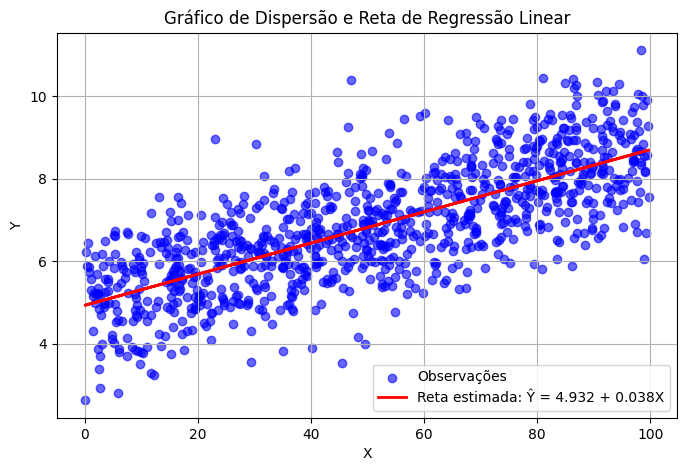

In [ ]:
import matplotlib.pyplot as plt

# 5. Criar os valores ajustados
Y_chapeu = alfa_chapeu + beta_chapeu * X

# 6. Plotar o gráfico de dispersão + reta estimada
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', label='Observações', alpha=0.6)
plt.plot(X, Y_chapeu, color='red', linewidth=2, label=f'Reta estimada: Ŷ = {alfa_chapeu:.3f} + {beta_chapeu:.3f}X')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersão e Reta de Regressão Linear')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Número de observações
n = len(X)

# Passo 1: calcular resíduos
residuos = Y - Y_chapeu

# Passo 2: estimar variância dos resíduos (sigma^2)
s2 = np.sum(residuos**2) / (n - 2)
print("Variância dos resíduos (sigma^2) =", np.round(s2, 4))

# Passo 3: calcular Sxx
Sxx = np.sum((X - X_media)**2)
print("Sxx =", np.round(Sxx, 4))

# Passo 4: estimar variância de beta chapéu
var_beta = s2 / Sxx
print("Var(beta_chapeu) =", np.round(var_beta, 6))

# Passo 5: calcular desvio-padrão de beta chapéu
se_beta = np.sqrt(var_beta)
print("Erro-padrão de beta_chapeu =", np.round(se_beta, 4))

Variância dos resíduos (sigma^2) = 0.9469
Sxx = 802951.3259
Var(beta_chapeu) = 1e-06
Erro-padrão de beta_chapeu = 0.0011


In [ ]:
# Já temos: n, X, Y, alfa_chapeu, beta_chapeu
u=residuos

# (i) Somatório dos resíduos
sum_u = np.sum(u)
print("∑ û_i =", np.round(sum_u, 12))

# (ii) Somatório de x_i * û_i
sum_xu = np.sum(X * u)
print("∑ x_i û_i =", np.round(sum_xu, 12))

# (iii) Covariância entre ŷ e û  (amostral, ddof=1)
cov_Y_chapeu = np.cov(Y_chapeu, u, ddof=1)[0, 1]
print("Cov(ŷ, û) =", np.round(cov_Y_chapeu, 12))

∑ û_i = 0.0
∑ x_i û_i = -9e-12
Cov(ŷ, û) = -0.0
≈0? ∑û: True | ∑x_i û_i: True | Cov(ŷ,û): True


In [17]:
# (iii) Covariância manual entre ŷ e û
Y_chapeu_media = Y_chapeu.mean()
u_media = u.mean()

# Aplicando a fórmula manual da covariância
cov_Y_chapeu_manual = np.sum((Y_chapeu - Y_chapeu_media) * (u - u_media)) / (n - 1)

print("Cov(ŷ, û) [manual] =", np.round(cov_Y_chapeu_manual, 12))

cov_Y_chapeu = np.cov(Y_chapeu, u, ddof=1)[0, 1]

print("Cov(ŷ, û) [python]=", np.round(cov_Y_chapeu, 12))

Cov(ŷ, û) [manual] = -0.0
Cov(ŷ, û) [python]= -0.0


In [21]:
# Médias
Y_media = Y.mean()

# Somatórios de quadrados
SQT = np.sum((Y - Y_media)**2)
SQR = np.sum((Y_chapeu - Y_media)**2)
SQE = np.sum((Y-Y_chapeu)**2)

# R^2
R2 = SQR / SQT

print("SQT =", np.round(SQT, 6))
print("SQR =", np.round(SQR, 6))
print("SQE =", np.round(SQE, 6))
print("R^2 (SQR/SQT) =", np.round(R2, 6))

# Checagem da decomposição ortogonal
print("SQT ≈ SQR + SQE ?",
      np.isclose(SQT, SQR + SQE, atol=1e-10))

SQT = 2089.430216
SQR = 1144.427428
SQE = 945.002788
R^2 (SQR/SQT) = 0.547722
SQT ≈ SQR + SQE ? True


In [23]:
se_beta = np.sqrt(var_beta)
print("Desvio-padrão de beta_chapeu =", np.round(se_beta, 4))

Desvio-padrão de beta_chapeu = 0.0011


In [27]:
from scipy.stats import t

# Graus de liberdade
gl = n - 2

# Valores críticos t
t_95 = t.ppf(0.975, gl)
t_99 = t.ppf(0.995, gl)

# Intervalos de confiança
IC95_inf = beta_chapeu - t_95 * se_beta
IC95_sup = beta_chapeu + t_95 * se_beta
IC99_inf = beta_chapeu - t_99 * se_beta
IC99_sup = beta_chapeu + t_99 * se_beta

# Exibição
print("Erro-padrão de β̂ =", np.round(se_beta, 5))
print("IC 95% para β:", np.round(IC95_inf, 4), "a", np.round(IC95_sup, 4))
print("IC 99% para β:", np.round(IC99_inf, 4), "a", np.round(IC99_sup, 4))

Erro-padrão de β̂ = 0.00109
IC 95% para β: 0.0356 a 0.0399
IC 99% para β: 0.035 a 0.0406


In [29]:
# Exemplo: substitua pelo beta que você usou ao gerar os dados
beta_verdadeiro = 0.037 

# Impressão organizada dos resultados
print("------ Comparação dos parâmetros ------")
print(f"β verdadeiro        = {beta_verdadeiro:.4f}")
print(f"β̂ (estimado)        = {beta_chapeu:.4f}")
print("----------------------------------------")
print(f"IC 95%: [{IC95_inf:.4f} , {IC95_sup:.4f}]")
print(f"IC 99%: [{IC99_inf:.4f} , {IC99_sup:.4f}]")
print("----------------------------------------")

# Verificação automática de inclusão
dentro_95 = IC95_inf <= beta_verdadeiro <= IC95_sup
dentro_99 = IC99_inf <= beta_verdadeiro <= IC99_sup

print(f"Pertence ao IC 95%? {'Sim ✅' if dentro_95 else 'Não ❌'}")
print(f"Pertence ao IC 99%? {'Sim ✅' if dentro_99 else 'Não ❌'}")

------ Comparação dos parâmetros ------
β verdadeiro        = 0.0370
β̂ (estimado)        = 0.0378
----------------------------------------
IC 95%: [0.0356 , 0.0399]
IC 99%: [0.0350 , 0.0406]
----------------------------------------
Pertence ao IC 95%? Sim ✅
Pertence ao IC 99%? Sim ✅


In [33]:
from scipy.stats import norm

n = len(X)
alpha = 5
beta = 0.037

# Criar 20 novas amostras (B, C, E) ---
data = {'X': X}

for i in range(1, 21):
    # Coluna B_i: números aleatórios uniformes U(0,1)
    B = np.random.rand(n)
    
    # Coluna C_i: inverso da CDF da normal padrão (INV.NORMP)
    C = norm.ppf(B)
    
    # Coluna E_i: variável Y gerada pelo modelo populacional
    E = alpha + beta * X + C
    
    # Adicionar ao dicionário
    data[f'B{i}'] = B
    data[f'C{i}'] = C
    data[f'E{i}'] = E

# --- Criar DataFrame final ---
df_MC = pd.DataFrame(data)

# --- Visualizar as primeiras linhas ---
print(df_MC.head().round(3))

        X     B1     C1     E1     B2     C2     E2     B3     C3     E3  ...  \
0  44.674  0.989  2.296  8.949  0.848  1.027  7.680  0.700  0.525  7.178  ...   
1  21.655  0.632  0.337  6.138  0.213 -0.797  5.004  0.418 -0.206  5.595  ...   
2  18.142  0.242 -0.700  4.971  0.033 -1.841  3.830  0.803  0.852  6.523  ...   
3  31.517  0.998  2.818  8.984  0.780  0.771  6.937  0.921  1.409  7.575  ...   
4  44.746  0.223 -0.762  5.893  0.225 -0.755  5.900  0.070 -1.479  5.177  ...   

     E17    B18    C18    E18    B19    C19    E19    B20    C20    E20  
0  5.159  0.371 -0.329  6.324  0.678  0.462  7.115  0.625  0.318  6.971  
1  5.393  0.186 -0.893  4.908  0.398 -0.257  5.544  0.519  0.048  5.849  
2  5.816  0.162 -0.985  4.687  0.634  0.343  6.014  0.967  1.834  7.505  
3  6.604  0.878  1.167  7.333  0.299 -0.527  5.639  0.057 -1.585  4.581  
4  8.194  0.722  0.590  7.245  0.999  3.086  9.741  0.961  1.757  8.413  

[5 rows x 61 columns]


Betas estimados: [0.03684 0.03435 0.03554 0.03657 0.03637 0.03518 0.03646 0.0382  0.03627
 0.03804 0.0347  0.03922 0.03493 0.036   0.03652 0.03618 0.0366  0.03538
 0.03782 0.03564]
Média das estimativas: 0.03634
Desvio padrão das estimativas: 0.00121


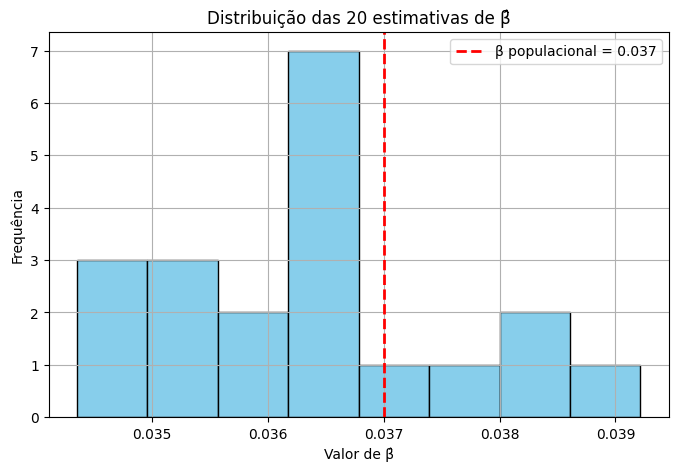

In [36]:
import numpy as np

# Lista para armazenar os betas estimados
betas_chapeu = []

# Calcular beta_chapeu para cada uma das 20 amostras
for i in range(1, 21):
    Y = df_MC[f'E{i}'].values
    X_media = X.mean()
    Y_media = Y.mean()
    beta_chapeu = np.sum((X - X_media)*(Y - Y_media)) / np.sum((X - X_media)**2)
    betas_chapeu.append(beta_chapeu)

# Converter para array e mostrar resultados
betas_chapeu = np.array(betas_chapeu)
print("Betas estimados:", np.round(betas_chapeu, 5))
print(f"Média das estimativas: {betas_chapeu.mean():.5f}")
print(f"Desvio padrão das estimativas: {betas_chapeu.std():.5f}")

# Plotar histograma das estimativas
plt.figure(figsize=(8,5))
plt.hist(betas_chapeu, bins=8, color='skyblue', edgecolor='black')
plt.axvline(beta, color='red', linestyle='--', linewidth=2, label=f'β populacional = {beta}')
plt.title('Distribuição das 20 estimativas de β̂')
plt.xlabel('Valor de β̂')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
from scipy.stats import t

n = len(X)
Xbar = X.mean()
Sxx = np.sum((X - Xbar)**2)     # mesmo para todas as amostras, X é fixo
df_gl = n - 2                   # graus de liberdade
t95 = t.ppf(1 - 0.05/2, df_gl)  # crítico t para 95%

resultados = []

for i in range(1, 21):
    Y = df_MC[f'E{i}'].values

    # (i) beta_hat
    Ybar = Y.mean()
    beta_hat = np.sum((X - Xbar)*(Y - Ybar)) / Sxx

    # alfa_hat (para resíduos)
    alpha_hat = Ybar - beta_hat * Xbar

    # valores ajustados e resíduos
    Y_hat = alpha_hat + beta_hat * X
    residuos = Y - Y_hat

    # variância do erro e (ii) erro-padrão de beta_hat
    s2 = np.sum(residuos**2) / df_gl
    se_beta = np.sqrt(s2 / Sxx)

    # (iii) IC 95% para beta
    lo95 = beta_hat - t95 * se_beta
    hi95 = beta_hat + t95 * se_beta

    resultados.append({
        "amostra": i,
        "beta_hat": beta_hat,
        "se_beta": se_beta,
        "IC95_lo": lo95,
        "IC95_hi": hi95,
        "t": (beta_hat - 0) / se_beta
    })

# Tabela final
tabela = pd.DataFrame(resultados)
print(tabela.round(6))

# (opcional) quantas CIs contêm o beta verdadeiro?
conta_cobertura = ((tabela["IC95_lo"] <= beta) & (tabela["IC95_hi"] >= beta)).sum()
print(f"\nCobertura 95%: {conta_cobertura}/20 CIs contêm o β verdadeiro ({beta}).")

    amostra  beta_hat   se_beta   IC95_lo   IC95_hi          t
0         1  0.036836  0.001117  0.034645  0.039027  32.990205
1         2  0.034352  0.001101  0.032192  0.036512  31.214867
2         3  0.035543  0.001156  0.033274  0.037812  30.742985
3         4  0.036567  0.001138  0.034333  0.038800  32.121010
4         5  0.036372  0.001087  0.034239  0.038506  33.459367
5         6  0.035183  0.001104  0.033017  0.037348  31.879898
6         7  0.036463  0.001106  0.034293  0.038633  32.968249
7         8  0.038204  0.001185  0.035879  0.040529  32.243974
8         9  0.036269  0.001139  0.034034  0.038503  31.853682
9        10  0.038044  0.001117  0.035852  0.040235  34.070101
10       11  0.034704  0.001107  0.032531  0.036877  31.338676
11       12  0.039217  0.001132  0.036996  0.041437  34.656788
12       13  0.034931  0.001125  0.032724  0.037138  31.062567
13       14  0.036002  0.001126  0.033792  0.038212  31.971841
14       15  0.036519  0.001108  0.034344  0.038694  32

In [40]:
alpha = 0.05       # nível de significância (5%)

# Valor crítico bicaudal (t de Student)
t_critico = t.ppf(1 - alpha/2, gl)
print(f"t crítico (95%) = {t_critico:.4f}")

t crítico (95%) = 1.9623
